In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
from datetime import datetime
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates
import random
import catboost as cb
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import train_test_split
import math


In [66]:
rf_train = pd.read_csv('rf_train.csv',encoding='ANSI')
rf_test = pd.read_csv('rf_test.csv',encoding='ANSI')

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score # 정확도 함수

## Random Forest

In [69]:
cols = ['area','Fruit','crops','crops_bat','Factiliy','count','store_km3','water_area_ha','res_num','people','fact_area','fact_bulid_area','fact_num','water']
from sklearn.model_selection import train_test_split

X_train = rf_train[cols[:-1]]
y_train = rf_train['water']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

X_test = rf_test[cols[:-1]]
y_test = rf_test['water']

In [71]:
import random
random.seed(124456)

In [72]:
params = {
    'n_estimators':(100, 200, 500),
    'max_depth' : (5, 8, 11),
    'min_samples_leaf' : (8, 13, 18),
    'min_samples_split' : (4, 8, 12)
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
#predict1 = clf.predict(X_test)
#print(accuracy_score(y_test,predict1))

최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 500}
최적 예측 정확도: 0.0362


In [73]:
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=4,n_estimators=500)
rf_run.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=4,
                      n_estimators=500, random_state=0)

In [75]:
# train rmse
train_predict = rf_run.predict(X_train)
print("NRMSE':{}".format(math.sqrt(mean_squared_error(train_predict, y_train))) )
print("NRMSE: {}".format(math.sqrt(mean_squared_error(train_predict, y_train))/(y_train.max()-y_train.min())))

# validation rmse
valid_predict = rf_run.predict(X_val)
print("NRMSE':{}".format(math.sqrt(mean_squared_error(valid_predict, y_val))) )
print("NRMSE: {}".format(math.sqrt(mean_squared_error(valid_predict, y_val))/(y_val.max()-y_val.min())))
# test rmse

rf_run_predict = rf_run.predict(X_test)
print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_run_predict, y_test))))
print("NRMSE: {}".format(math.sqrt(mean_squared_error(rf_run_predict, y_test))/(y_test.max()-y_test.min())))

NRMSE':98.84913139099079
NRMSE: 0.0869362562034342
NRMSE':150.0381704030132
NRMSE: 0.20593232095722253
RMSE':108.77668883084374
NRMSE: 0.366683596261061


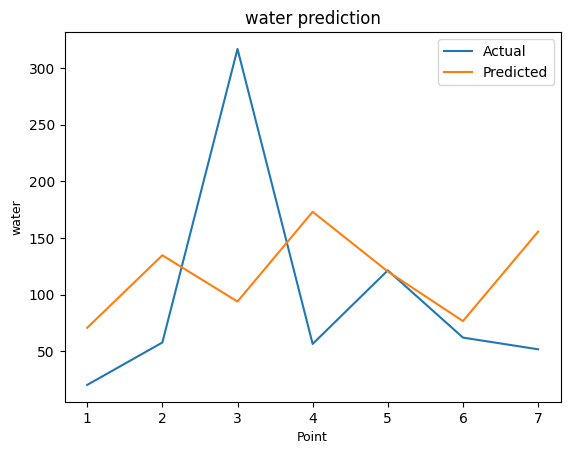

In [94]:
rf_test['pred_rf'] = rf_run_predict    

plt.xlabel("Point", fontsize=9)
plt.ylabel("water", fontsize=9)
plt.plot(rf_test['Unnamed: 0'], rf_test['water'], label='Actual')
plt.plot(rf_test['Unnamed: 0'], rf_test['pred_rf'], label='Predicted')
plt.legend()
plt.title("water prediction")
#plt.legend()
plt.show()

## XGBoost

### Scaling

In [76]:
scaler = MinMaxScaler()
rf_train_copy = rf_train.copy()
rf_train_copy['area'] = scaler.fit_transform(rf_train_copy['area'].values.reshape(-1,1))
rf_train_copy['Fruit'] = scaler.fit_transform(rf_train_copy['Fruit'].values.reshape(-1,1))
rf_train_copy['crops'] = scaler.fit_transform(rf_train_copy['crops'].values.reshape(-1,1))
rf_train_copy['crops_bat'] = scaler.fit_transform(rf_train_copy['crops_bat'].values.reshape(-1,1))
rf_train_copy['Factiliy'] = scaler.fit_transform(rf_train_copy['Factiliy'].values.reshape(-1,1))
rf_train_copy['count'] = scaler.fit_transform(rf_train_copy['count'].values.reshape(-1,1))
rf_train_copy['store_km3'] = scaler.fit_transform(rf_train_copy['store_km3'].values.reshape(-1,1))
rf_train_copy['water_area_ha'] = scaler.fit_transform(rf_train_copy['water_area_ha'].values.reshape(-1,1))
rf_train_copy['res_num'] = scaler.fit_transform(rf_train_copy['res_num'].values.reshape(-1,1))
rf_train_copy['people'] = scaler.fit_transform(rf_train_copy['people'].values.reshape(-1,1))
rf_train_copy['fact_area'] = scaler.fit_transform(rf_train_copy['fact_area'].values.reshape(-1,1))
rf_train_copy['fact_bulid_area'] = scaler.fit_transform(rf_train_copy['fact_bulid_area'].values.reshape(-1,1))
rf_train_copy['fact_num'] = scaler.fit_transform(rf_train_copy['fact_num'].values.reshape(-1,1))
rf_train_copy['water'] = scaler.fit_transform(rf_train_copy['water'].values.reshape(-1,1))

In [77]:
scaler = MinMaxScaler()
rf_test_copy = rf_test.copy()
rf_test_copy['area'] = scaler.fit_transform(rf_test_copy['area'].values.reshape(-1,1))
rf_test_copy['Fruit'] = scaler.fit_transform(rf_test_copy['Fruit'].values.reshape(-1,1))
rf_test_copy['crops'] = scaler.fit_transform(rf_test_copy['crops'].values.reshape(-1,1))
rf_test_copy['crops_bat'] = scaler.fit_transform(rf_test_copy['crops_bat'].values.reshape(-1,1))
rf_test_copy['Factiliy'] = scaler.fit_transform(rf_test_copy['Factiliy'].values.reshape(-1,1))
rf_test_copy['count'] = scaler.fit_transform(rf_test_copy['count'].values.reshape(-1,1))
rf_test_copy['store_km3'] = scaler.fit_transform(rf_test_copy['store_km3'].values.reshape(-1,1))
rf_test_copy['water_area_ha'] = scaler.fit_transform(rf_test_copy['water_area_ha'].values.reshape(-1,1))
rf_test_copy['res_num'] = scaler.fit_transform(rf_test_copy['res_num'].values.reshape(-1,1))
rf_test_copy['people'] = scaler.fit_transform(rf_test_copy['people'].values.reshape(-1,1))
rf_test_copy['fact_area'] = scaler.fit_transform(rf_test_copy['fact_area'].values.reshape(-1,1))
rf_test_copy['fact_bulid_area'] = scaler.fit_transform(rf_test_copy['fact_bulid_area'].values.reshape(-1,1))
rf_test_copy['fact_num'] = scaler.fit_transform(rf_test_copy['fact_num'].values.reshape(-1,1))
rf_test_copy['water'] = scaler.fit_transform(rf_test_copy['water'].values.reshape(-1,1))

### Modeling

C:\Users\junsuk\miniconda3\envs\eemd\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


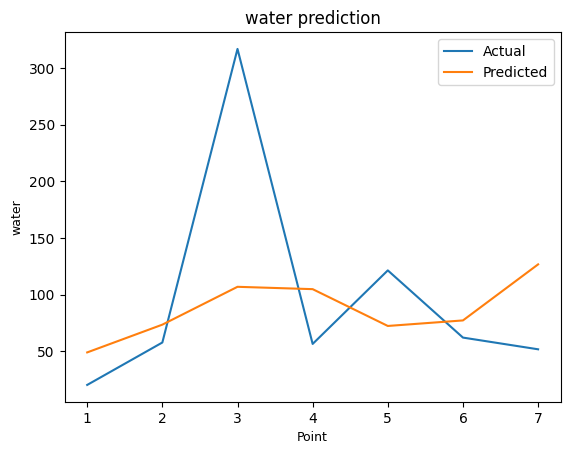

NRMSE: 0.3009176463957925
Validation NRMSE: 0.20741224840464795


In [95]:
cols = ['area','Fruit','crops','crops_bat','Factiliy','count','store_km3','water_area_ha','res_num','people','fact_area','fact_bulid_area','fact_num','water']

X_train2 = rf_train_copy[cols[:-1]]
y_train2 = rf_train_copy['water']
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.2, random_state=42)

X_test2 = rf_test_copy[cols[:-1]]
y_test2 = rf_test_copy['water']

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                              colsample_bytree=0.8, 
                              learning_rate=0.05,
                              max_depth=12, 
                              alpha=2, 
                              n_estimators=300)

xg_reg.fit(X_train2, y_train2, eval_set=[(X_val2, y_val2)], early_stopping_rounds=10, verbose=False)
    # 모델 예측
y_pred = xg_reg.predict(X_test2)

min_value = rf_test['water'].min()
max_value = rf_test['water'].max()

nrmse = np.sqrt(np.mean((y_pred - y_test2) ** 2))

# 역변환을 통해 스케일링 이전의 예측값 얻기
original_pred = (y_pred * (max_value - min_value)) + min_value
rf_test['pred'] = original_pred    

plt.xlabel("Point", fontsize=9)
plt.ylabel("water", fontsize=9)
plt.plot(rf_test['Unnamed: 0'], rf_test['water'], label='Actual')
plt.plot(rf_test['Unnamed: 0'], rf_test['pred'], label='Predicted')
plt.legend()
plt.title("water prediction")
#plt.legend()
plt.show()
print("NRMSE: {}".format(nrmse))
valid_predict = xg_reg.predict(X_val2)
val_nrmse = np.sqrt(mean_squared_error(valid_predict, y_val2)) / (y_val2.max() - y_val2.min())
print("Validation NRMSE: {}".format(val_nrmse))

## Regression

R에서 ㅎㅎ